In [13]:
import dmdd
import numpy as np
%matplotlib inline


In [5]:
# Testing the object Experiment
# Pass efficiency function
xe = dmdd.Experiment('1xe', 'xenon', 5, 100, 2000, dmdd.eff.efficiency_unit)

print 'experiment: {} ({:.0f} kg-yr)'.format(xe.name, xe.exposure)

# The minimum detectable WIMP mass (head-on collision, transfers all of momentum)
# With AM the v_lag will be changing with time
minimum_mx = xe.find_min_mass(v_esc=540., v_lag=220., mx_guess=1.) 
print 'minimum detectable WIMP mass: {:.1f} GeV'.format(minimum_mx)

# The exclusion curve or maximum exclusion at 50 GeV (mass), assuming 4 background events (Nbackground)
sigma_exp = xe.sigma_limit(sigma_name='sigma_si', fnfp_name='fnfp_si', fnfp_val=-1.1,
                                mass=50, Nbackground=4, sigma_guess = 1e10, mx_guess=1.,
                                v_esc=540., v_lag=220., v_rms=220., rho_x=0.3)
anapole_exp = xe.sigma_limit(sigma_name='sigma_anapole', fnfp_name='fnfp_anapole', fnfp_val=-1.1,
                            mass=50, Nbackground=4, sigma_guess=1e10, mx_guess=1.,
                            v_esc=540., v_lag=220., v_rms=220., rho_x=0.3)

sigma_normalized = sigma_exp * dmdd.PAR_NORMS['sigma_si']
anapole_normalized = anapole_exp * dmdd.PAR_NORMS['sigma_anapole']

print 'projected exclusion for SI scattering @ 50 GeV: sigma_p = {:.2e} cm^2'.format(sigma_normalized)
print 'projected exclusion for Anapole scattering @ 50 GeV: sigma_p = {:.2e} cm^2'.format(anapole_normalized)


experiment: 1xe (2000 kg-yr)
minimum detectable WIMP mass: 7.3 GeV
projected exclusion for SI scattering @ 50 GeV: sigma_p = 1.93e-46 cm^2
projected exclusion for Anapole scattering @ 50 GeV: sigma_p = 5.28e-41 cm^2


In [6]:
# Testing the object Model


# shortcut for scattering models corresponding to rates coded in rate_UV:
anapole_model = dmdd.UV_Model('Anapole', ['mass','sigma_anapole'])
SI = dmdd.UV_Model('SI', ['mass','sigma_si'])

print 'model: {}, parameters: {}.'.format(anapole_model.name, anapole_model.param_names)
print 'model: {}, parameters: {}.'.format(SI.name, SI.param_names)

model: Anapole, parameters: ['mass', 'sigma_anapole'].
model: SI, parameters: ['mass', 'sigma_si'].


Simulation data and/or pickle file does not exist. Forcing simulation.


simulated: 289 events (expected 304).

 List of energies generated in xesim is: 

[ 23.78337834  26.48164816   5.37053705  10.22552255  13.07580758
  11.02360236  25.2560256   15.54605461  26.32013201   6.51065107
  14.8619862   14.10191019  18.05430543   6.51065107  11.88818882
  10.70057006   9.24692469   6.18761876  22.58625863  10.53905391
  12.54375438   9.7979798   31.30813081  13.99739974   5.19951995
   8.23032303  13.53185319   6.45364536   7.93579358  11.15661566
  19.7929793    8.23032303  18.34883488   8.44884488   7.66976698
   7.40374037  17.21822182  18.44384438   6.36813681  23.13731373
   5.27552755   9.949995     5.0190019    7.46074607   8.42984298
  12.27772777   5.81708171  17.84528453  18.63386339  23.65986599
  15.87858786  30.0160016   21.79767977   7.30873087  24.50545055
  40.34353435   7.65076508   6.41564156   6.55815582  16.73367337
   5.85508551   7.28972897  21.01860186  16.72417242 

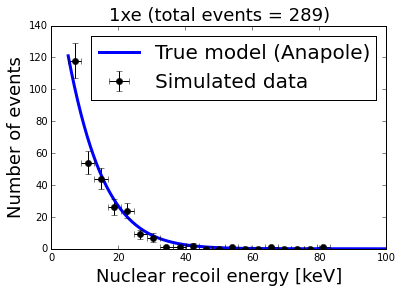

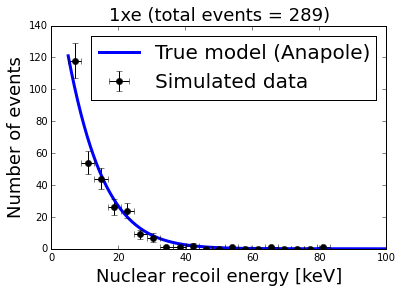

In [20]:
# Testing the object Simulation

# intialize an Experiment with XENON target, to be passed to Simulation:
# (this is the same as the experiment test above)
xe = dmdd.Experiment('1xe', 'xenon', 5, 100, 2000, dmdd.eff.efficiency_unit, energy_resolution=True)

# initialize a simulation with xe, for SI and Anapole models defined above,
# for 50 GeV WIMP, for sigma_si = 70*PAR_NORMS['sigma_si'] and PAR_NORMS['sigma_anapole'] 
# what's the 70 here for? does it stay for anapole?
test = dmdd.Simulation('xesim', xe, anapole_model, {'mass':50.,'sigma_anapole':40.})


dmdd.Simulation.plot_data(test)



# Simulation worked, but did not display a graph.
# For test/xesim: 
# Simulation data and/or pickle file does not exist. Forcing simulation.
# simulated: 507 events (expected 532).

print '\n List of energies generated in {} is: \n\n'.format(test.name),test.Q

